In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from GoogleNgrams import GoogleNgrams

In [270]:
US_suppression = list(np.loadtxt('US_suppression.txt', dtype='str', delimiter='\n'))
US_suppression

['John Howard Lawson',
 'Albert Maltz',
 'Dalton Trumbo',
 'Alvah Bessie',
 'Edward Dmytryk',
 'Herbert Biberman',
 'Lester Cole',
 'Ring Lardner Jr.',
 'Samuel Ornitz',
 'Adrian Scott']

Text(0.5, 1.0, 'Hollywood Ten in US Corpus')

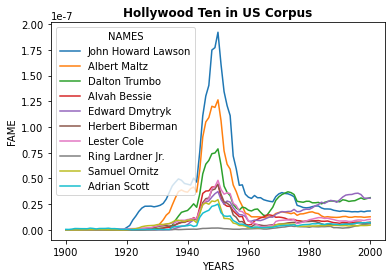

In [373]:
US_sup = GoogleNgrams(', '.join(US_suppression), B = 1900, C=2000, D='eng_us_2019')
US_sup.columns.name = 'NAMES'
US_sup.index.name = 'YEARS'
US_sup.plot()         # 1947 ~ 1960 억압기간 : 할리우드 배우 10인
plt.ylabel('FAME')
plt.title('Hollywood Ten in US Corpus', weight='bold')

<AxesSubplot:xlabel='YEARS'>

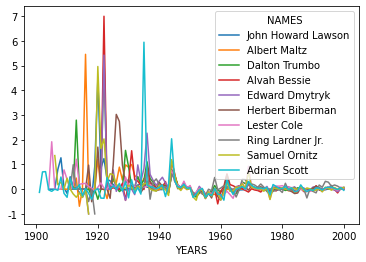

In [374]:
US_sup.pct_change().plot()

Text(0.5, 1.0, 'Hollywood Ten in US Corpus (MEDIAN)')

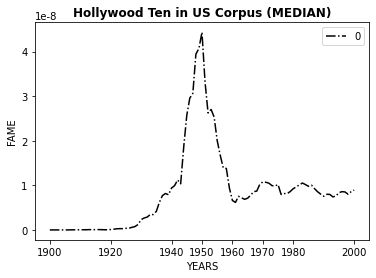

In [375]:
US_sup_MED = pd.DataFrame(US_sup.median(1))
US_sup_MED.plot(linestyle='-.', color='k')
plt.ylabel('FAME')
plt.xticks([1900,1920,1940,1950,1960,1970,1980,2000])
plt.title('Hollywood Ten in US Corpus (MEDIAN)', weight='bold')

Text(0.5, 1.0, 'Hollywood Ten in US Corpus (MEDIAN)')

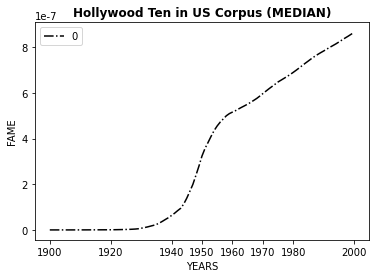

In [275]:
US_sup_MED.cumsum().plot(linestyle='-.', color='k')
plt.ylabel('FAME')
plt.xticks([1900,1920,1940,1950,1960,1970,1980,2000])
plt.title('Hollywood Ten in US Corpus (MEDIAN)', weight='bold')

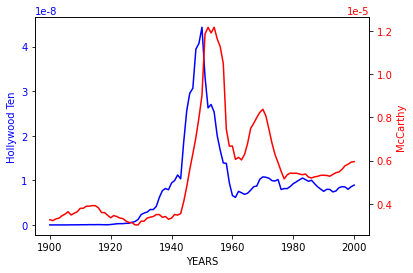

In [74]:
US_sup_MED = pd.DataFrame(US_sup.median(1))
US_McCarthy = GoogleNgrams('McCarthy', B = 1900, C=2000, D='eng_us_2019')

fig, ax1 = plt.subplots()
ax1.set_xlabel('YEARS')
ax1.set_ylabel('Hollywood Ten', color='blue')
ax1.plot(US_sup_MED, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('McCarthy', color='red')
ax2.plot(US_McCarthy, color='red')
ax2.tick_params(axis='y', labelcolor='red')

In [ ]:
# 약 1950년 메카시 상원의원의 명성이 정점에 도달했을 때 할리우드 10인의 명성 하락 시작
# 약 1955년 메카시 상원의원이 명성 하락 시작
# 약 1960년 메카시 상원의원의 명성이 최저에 이르렀을 때 할리우드 10인의 명성 상승 시작

# 1950-1955년간 일관되게 유지되었던 조지프 메카시의 명성이 급격히 하락한 이유는 무엇인가?

Text(0.5, 1.0, 'US Political Party Trend')

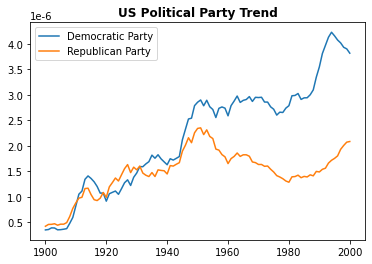

In [377]:
US_dem_rep_PARTY = GoogleNgrams('Democratic Party, Republican Party', 
                                B = 1900, C=2000, D='eng_us_2019')
US_dem_rep_PARTY.plot()
plt.title('US Political Party Trend', weight='bold')

<AxesSubplot:>

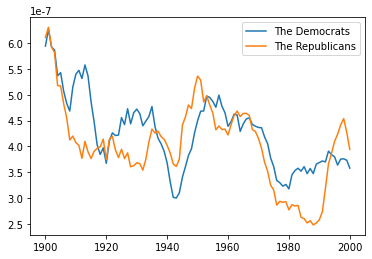

In [376]:
US_dem_rep_PARTY = GoogleNgrams('The Democrats, The Republicans', B = 1900, C=2000, D='eng_us_2019')
US_dem_rep_PARTY.plot()

Text(0.5, 1.0, 'The Influence of Two Political Party (NOUN)')

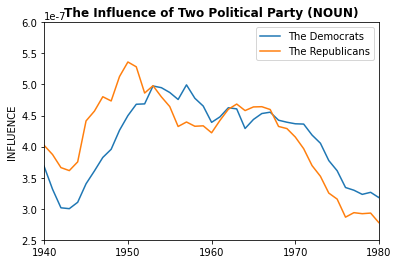

In [379]:
US_dem_rep_PARTY = GoogleNgrams('The Democrats, The Republicans', 
                                B = 1900, C=2000, D='eng_us_2019')
US_dem_rep_PARTY.plot()
plt.axis([1940,1980,2.5e-7,6e-7])
plt.xticks([1940,1950,1960,1970,1980])
plt.ylabel('INFLUENCE')
plt.title('The Influence of Two Political Party (NOUN)', weight='bold')

In [ ]:
# 1950년부터 공화당의 영향력 하락
# 1953년부터 1960년까지 민주당의 공화당의 영향력 초월
# 1954년 조지프 메카시에 대한 비판 결의 채택
# 공화당의 영향력(명성)이 저점대에 달한 1960년에 명예회복 시작
# 약 5년간의 정권교체기간 필요 예상

# 실제 1953까지 민주당이 집권당이었음에도 불구하고 출판/유통된 내용은 공화당이 우세

<AxesSubplot:>

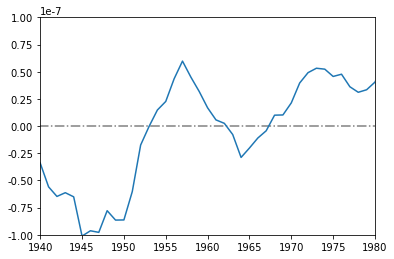

In [329]:
a = US_dem_rep_PARTY['The Democrats'] - US_dem_rep_PARTY['The Republicans']
plt.hlines(0, 1900, 2000, linestyle='-.', color='grey')
plt.axis([1940,1980,-1e-7,1e-7])
a.plot()

Text(0.5, 1.0, 'The Influence of Two Political ADJ')

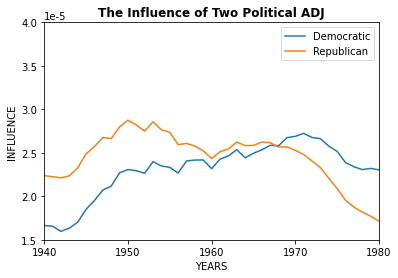

In [381]:
US_dem_rep_ADJ = GoogleNgrams('Democratic, Republican', B = 1900, C=2000, D='eng_us_2019')
US_dem_rep_ADJ.plot()
plt.axis([1940,1980,1.5e-5,4e-5])
plt.xticks([1940,1950,1960,1970,1980])
plt.xlabel('YEARS')
plt.ylabel('INFLUENCE')
plt.title('The Influence of Two Political ADJ', weight='bold')

In [ ]:
# 민주당과 공화당을 대표하는 형용사로 데이터를 추출
# The Democrats, The Republicans 보다 추구하는 가치의 변화 포착
# 1950년부터 'Republican' 빈도 정체, 1954년부터 꾸준히 하락세
# 1950년부터 'Democratic' 빈도 꾸준히 상승세

<AxesSubplot:>

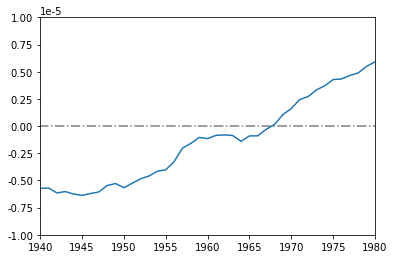

In [328]:
a = US_dem_rep_ADJ['Democratic'] - US_dem_rep_ADJ['Republican']
plt.hlines(0, 1900, 2000, linestyle='-.', color='grey')
plt.axis([1940,1980,-1e-5,1e-5])
a.plot()

In [384]:
US_dem_rep_PARTY.columns = ['DEM', 'REP']
US_dem_rep_ADJ.columns = ['DEM', 'REP']
US_dem_rep_NOUN_ADJ = pd.merge(US_dem_rep_PARTY, US_dem_rep_ADJ, left_index=True, right_index=True, 
                               suffixes=['_NOUN', '_ADJ'])
US_dem_rep_NOUN_ADJ.head()

,DEM_NOUN,REP_NOUN,DEM_ADJ,REP_ADJ
1900,5.943880e-07,6.111457e-07,0.000020,0.000039
1901,6.267058e-07,6.308210e-07,0.000021,0.000039
1902,5.926260e-07,5.927591e-07,0.000020,0.000040
1903,5.866815e-07,5.819056e-07,0.000020,0.000039
1904,5.369485e-07,5.179634e-07,0.000019,0.000036


In [385]:
US_dem_rep_NOUN_ADJ.columns = pd.MultiIndex.from_product([['Noun', 'Adj'],['Dem', 'Rep']], 
                                                         names=['Class', 'Party'])
US_dem_rep_NOUN_ADJ.head()

Class          Noun                     Adj          
Party           Dem           Rep       Dem       Rep
1900   5.943880e-07  6.111457e-07  0.000020  0.000039
1901   6.267058e-07  6.308210e-07  0.000021  0.000039
1902   5.926260e-07  5.927591e-07  0.000020  0.000040
1903   5.866815e-07  5.819056e-07  0.000020  0.000039
1904   5.369485e-07  5.179634e-07  0.000019  0.000036

Text(0.5, 1.0, 'NOUN & ADJ')

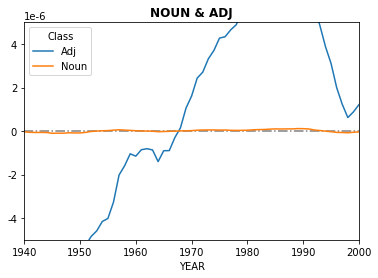

In [406]:
dem_rep_sub = US_dem_rep_NOUN_ADJ.groupby(level='Class', axis=1).agg(lambda x: x.iloc[:,0]-x.iloc[:,1])
dem_rep_sub.index.name = 'YEAR'
dem_rep_sub.plot()
plt.axis([1940,2000,-0.5e-5, 0.5e-5])
plt.hlines(0, 1900, 2000, linestyle='-.', color='grey')
plt.title('NOUN & ADJ', weight='bold')

<AxesSubplot:>

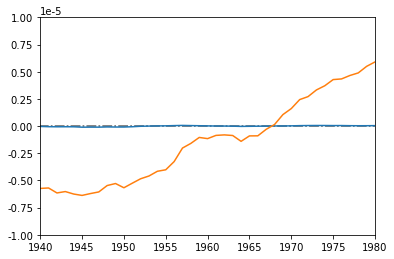

In [389]:
a = US_dem_rep_PARTY['DEM'] - US_dem_rep_PARTY['REP']
plt.hlines(0, 1900, 2000, linestyle='-.', color='grey')
plt.axis([1940,1980,-1e-7,1e-7])
a.plot()

b = US_dem_rep_ADJ['DEM'] - US_dem_rep_ADJ['REP']
plt.hlines(0, 1900, 2000, linestyle='-.', color='grey')
plt.axis([1940,1980,-1e-5,1e-5])
b.plot()

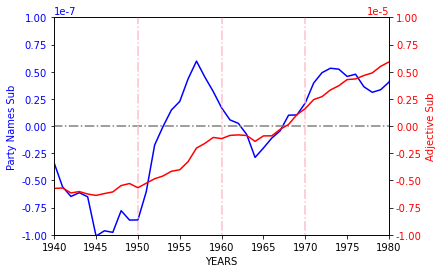

In [404]:
a = US_dem_rep_PARTY['DEM'] - US_dem_rep_PARTY['REP']
b = US_dem_rep_ADJ['DEM'] - US_dem_rep_ADJ['REP']

fig, ax1 = plt.subplots()
ax1.set_xlabel('YEARS')
ax1.set_ylabel('Party Names Sub', color='blue')
ax1.set_xlim([1940,1980])
ax1.set_ylim([-1e-7,1e-7])
ax1.plot(a, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Adjective Sub', color='red')
ax2.set_ylim([-1e-5,1e-5])
ax2.plot(b, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.hlines(0, 1900, 2000, linestyle='-.', color='grey')
plt.vlines(1950, -1, 1, linestyle='-.', color='pink')
plt.vlines(1960, -1, 1, linestyle='-.', color='pink')
plt.vlines(1970, -1, 1, linestyle='-.', color='pink')

<AxesSubplot:>

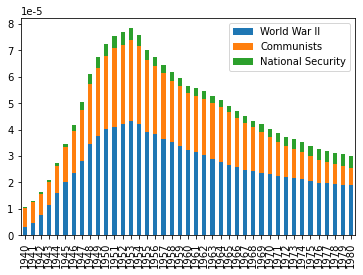

In [409]:
SubjectsA = GoogleNgrams('World War II, Communists, National Security', 
                         B = 1900, C=2000, D='eng_us_2019').reindex(range(1940,1981,1))
SubjectsA.plot.bar(stacked=True)

Text(0.5, 1.0, 'The Influence of "Republican" ADJ')

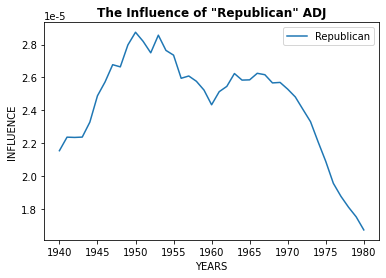

In [410]:
US_rep_ADJ = GoogleNgrams('Republican', B = 1940, C=1980, D='eng_us_2019')
US_rep_ADJ.plot()
plt.xlabel('YEARS')
plt.ylabel('INFLUENCE')
plt.title('The Influence of "Republican" ADJ', weight='bold')

In [345]:
US_dem_rep_ADJ = GoogleNgrams('Democratic, Republican', B = 1900, C=2000, D='eng_us_2019')
US_dem_rep_ADJ['DECADE'] = [str(index)[:-1]+'0' for index in US_dem_rep.index]
US_dem_rep_MED = US_dem_rep.groupby(US_dem_rep_ADJ.DECADE, axis=0).median()
US_dem_rep_MED

,The Democrats,The Republicans
DECADE,,
1900,5.399231e-07,5.175013e-07
1910,5.089911e-07,3.976998e-07
1920,4.342767e-07,3.830631e-07
1930,4.445206e-07,4.114473e-07
1940,3.505032e-07,4.216174e-07
1950,4.768436e-07,4.722725e-07
1960,4.457976e-07,4.588527e-07
1970,3.693638e-07,3.203633e-07
1980,3.527587e-07,2.615646e-07


<AxesSubplot:xlabel='DECADE'>

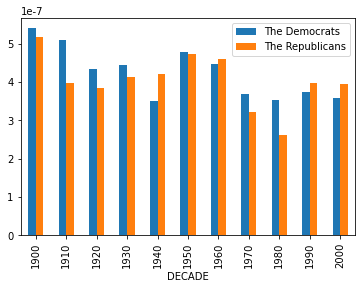

In [119]:
US_dem_rep_MED.plot.bar()

<AxesSubplot:xlabel='DECADE'>

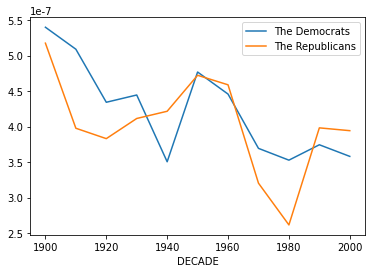

In [104]:
US_dem_rep_MED.plot()
